In [7]:
import pandas as pd
import numpy as np
import talib as ta
import os
import matplotlib.pyplot as plt
import warnings
import pymongo
from datetime import datetime

warnings.filterwarnings('ignore')

def prepareData(collection, startTime, endTime, rsPeriod):
    data_df = pd.DataFrame(
        list(collection.find({"datetime": {'$gt': startTime, '$lt': endTime}}))
    )
#     data = data_df[['datetime', 'open', 'high', 'low', 'close', 'volume']].copy()
    data = data_df.copy()
#     hlcvDict = {'open':'first', 'high':'max', 'low':'min', 'close': 'last','volume':'sum'}
    data = data.set_index('datetime')
#     dataDf = data.resample(rsPeriod).apply(hlcvDict)
#     dataDf = dataDf.dropna()
#     return dataDf
    return data

# symbol = 'eth_usdt.spot:binance'
symbol = 'absorptionRatioBBELB'
client = pymongo.MongoClient('172.16.11.81', 27017)
# collection = client['Kline_1Min_Auto_Db_Plus'][symbol]
collection = client['multiSymbolsIndicator'][symbol]

startTime = datetime(2018, 5, 1)
endTime = datetime(2021,11,23)
rsPeriod = '5min' #无用参数，为了保留原函数结构而保留
dataCoin = prepareData(collection, startTime, endTime, rsPeriod)

In [8]:
dataCoin

,_id,ar18,ar36,ar72,ar144,ar288,ar864,ar1440,ar2016,ar2880,symbols
datetime,,,,,,,,,,,
2018-05-01 08:00:00,61717afbf623bfac6335d0db,0.650438,0.719781,0.802428,0.792385,0.762127,NaN,NaN,NaN,NaN,"bnb,btc,eth,ltc,bch"
2018-05-01 08:05:00,61717afbf623bfac6335d0de,0.655726,0.721793,0.801470,0.792896,0.762356,NaN,NaN,NaN,NaN,"bnb,btc,eth,ltc,bch"
2018-05-01 08:10:00,61717afbf623bfac6335d0e1,0.616633,0.720171,0.802315,0.793355,0.762382,NaN,NaN,NaN,NaN,"bnb,btc,eth,ltc,bch"
2018-05-01 08:15:00,61717afbf623bfac6335d0e4,0.629555,0.714484,0.801645,0.793589,0.762214,NaN,NaN,NaN,NaN,"bnb,btc,eth,ltc,bch"
2018-05-01 08:20:00,61717afbf623bfac6335d0e7,0.759874,0.763315,0.799138,0.798330,0.762416,NaN,NaN,NaN,NaN,"bnb,btc,eth,ltc,bch"
...,...,...,...,...,...,...,...,...,...,...,...
2021-11-22 23:35:00,619da042780d60de8167ba88,0.899323,0.924891,0.911404,0.909526,0.902927,0.871059,0.883969,0.894798,0.869858,"bnb,btc,eth,ltc,bch"
2021-11-22 23:40:00,619da042780d60de8167ba8b,0.904615,0.923794,0.911381,0.909448,0.902783,0.871106,0.883929,0.894828,0.869854,"bnb,btc,eth,ltc,bch"
2021-11-22 23:45:00,619da042780d60de8167ba8e,0.903164,0.924253,0.911655,0.909832,0.902985,0.871248,0.883745,0.894830,0.869813,"bnb,btc,eth,ltc,bch"


In [5]:
dataCoin

,open,high,low,close,volume
datetime,,,,,
2021-01-18 22:36:00,1223.77,1227.41,1222.29,1226.60,4563.69741
2021-01-18 22:37:00,1226.44,1228.66,1225.75,1228.65,1097.43490
2021-01-18 22:38:00,1228.65,1229.99,1224.50,1228.98,1342.21075
2021-01-18 22:39:00,1229.12,1232.14,1228.61,1231.18,1315.06534
2021-01-18 22:40:00,1231.09,1234.03,1230.09,1233.42,1263.66949
...,...,...,...,...,...
2021-11-22 23:55:00,4233.84,4235.87,4231.76,4232.95,353.06160
2021-11-22 23:56:00,4232.96,4236.87,4231.66,4233.15,476.16450
2021-11-22 23:57:00,4233.15,4235.42,4230.26,4232.57,262.09430


In [2]:
dataCoin

,open,high,low,close,volume
datetime,,,,,
2020-05-01 00:00:00,207.36,210.45,203.06,207.47,85826.84826
2020-05-01 01:00:00,207.46,207.63,202.07,205.75,95749.83475
2020-05-01 02:00:00,205.75,210.36,205.69,209.16,65140.34463
2020-05-01 03:00:00,209.14,212.89,208.95,211.38,49399.53047
2020-05-01 04:00:00,211.37,212.41,210.00,211.49,36911.64476
...,...,...,...,...,...
2021-09-29 19:00:00,2928.14,2938.49,2915.00,2933.75,13015.29670
2021-09-29 20:00:00,2933.75,2950.00,2893.89,2910.24,20229.25670
2021-09-29 21:00:00,2910.39,2925.61,2895.00,2917.61,19767.07350


In [27]:
dataCoin['pctChange'] = dataCoin['close'].pct_change()
dataCoin['pctStd'] = ta.STDDEV(dataCoin['pctChange'], 120)*(24**0.5)
dataCoin['pctStdVma'] = ta.SUM(dataCoin['pctStd']*dataCoin['volume'], 120) / ta.SUM(dataCoin['volume'], 120)
dataCoin['pctStdVSma'] = ta.EMA(dataCoin.pctStdVma, 120)
dataCoin['pctStdVLma'] = ta.MA(dataCoin.pctStdVma, 1000)

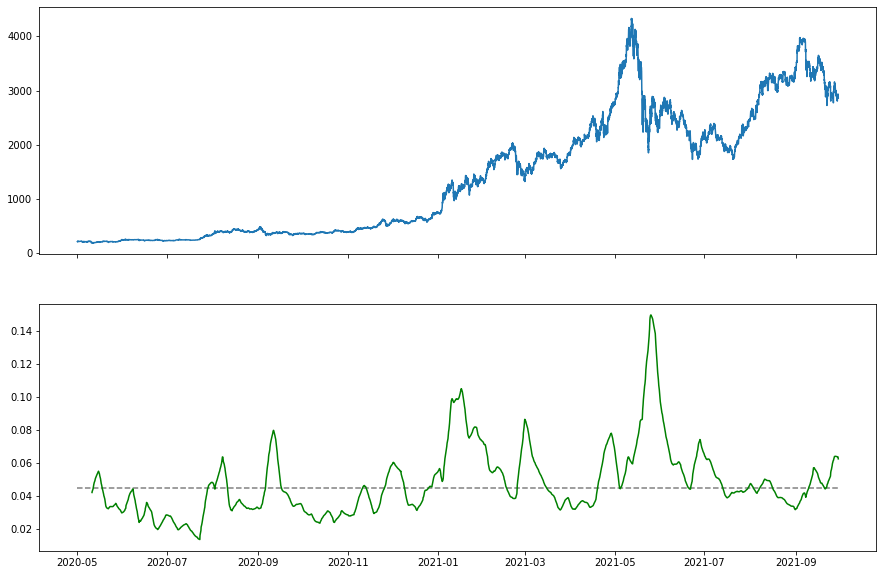

In [30]:
nBar = 30000
fig, (ax,ax1) = plt.subplots(2,1,sharex=True, figsize=(15,10))
 
ax.plot(dataCoin.close.iloc[-nBar:])
ax1.plot(dataCoin['pctStdVma'].iloc[-nBar:], 'g')
# ax1.plot(dataCoin['pctStdVLma'].iloc[-nBar:], 'y')
plt.hlines(0.045,dataCoin.index[0],dataCoin.index[-1] , linestyles='dashed', alpha=0.5)
plt.show()